#  McDonald's Inspection Data Analysis
### Using pandas, NumPy, Seaborn, and Matplotlib




Dataset link: https://data.cityofnewyork.us/Health/McDonald-s/kyws-ad2t/about_data

In [2]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Theme styling
sns.set_theme(style="whitegrid")
custom_palette = ["#FFC72C", "#DA291C", "#000000", "#D6D6D6"]
sns.set_palette(custom_palette)

# Plot style adjustments
plt.rcParams['axes.facecolor'] = '#FFFFFF'
plt.rcParams['figure.facecolor'] = '#FFFFFF'
plt.rcParams['axes.edgecolor'] = '#000000'

In [3]:
#  Load the Dataset
file_path = "McDonald_s_dasboard.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="McDonald_s_20250410")

##  Exploratory Data Analysis (EDA)

In [4]:
# Convert date columns to datetime
df['inspection_date'] = pd.to_datetime(df['inspection_date'], errors='coerce')
df['GRADE DATE'] = pd.to_datetime(df['GRADE DATE'], errors='coerce')
df['RECORD DATE'] = pd.to_datetime(df['RECORD DATE'], errors='coerce')

# Drop duplicates and missing essentials
df.drop_duplicates(inplace=True)
df.dropna(subset=['CAMIS', 'inspection_date'], inplace=True)

# General overview
print("Dataset Shape:", df.shape)
df.info()
df.describe(include='all')

Dataset Shape: (1982, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CAMIS                   1982 non-null   int64         
 1   DBA                     1982 non-null   object        
 2   BORO                    1982 non-null   object        
 3   BUILDING                1979 non-null   object        
 4   STREET                  1982 non-null   object        
 5   ZIPCODE                 1975 non-null   float64       
 6   PHONE                   1982 non-null   int64         
 7   CUISINE DESCRIPTION     1976 non-null   object        
 8   INSPECTION DATE         1982 non-null   object        
 9   clean_INSPECTION DATE   1982 non-null   object        
 10  inspection_date         1982 non-null   datetime64[ns]
 11  ACTION                  1976 non-null   object        
 12  VIOLATION CODE        

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,clean_INSPECTION DATE,inspection_date,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,1.982000e+03,1982,1982,1979.0,1982,1975.000000,1.982000e+03,1976,1982,1982,1982,1976,1966,1966,1982,1916.000000,1310,1302,1982,1976
unique,NaN,52,5,215.0,126,NaN,NaN,16,503,502,NaN,5,72,111,3,NaN,6,NaN,NaN,16
top,NaN,MCDONALD'S,Brooklyn,208.0,MCDONALD AVENUE,NaN,NaN,Hamburgers,05-13-2022,09 October 2024,NaN,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,NaN,A,NaN,NaN,Cycle Inspection / Initial Inspection
freq,NaN,1419,742,47.0,391,NaN,NaN,1384,17,17,NaN,1899,491,408,1044,NaN,1193,NaN,NaN,1399
mean,4.690412e+07,NaN,NaN,NaN,NaN,10820.851646,6.303913e+09,NaN,NaN,NaN,2023-03-04 09:55:02.119071488,NaN,NaN,NaN,NaN,16.204593,NaN,2023-08-06 13:20:44.239631360,2025-09-04 00:00:00,NaN
min,4.036779e+07,NaN,NaN,NaN,NaN,10001.000000,2.039134e+09,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,0.000000,NaN,2020-03-13 00:00:00,2025-09-04 00:00:00,NaN
25%,4.126249e+07,NaN,NaN,NaN,NaN,10451.000000,6.316670e+09,NaN,NaN,NaN,2022-09-27 00:00:00,NaN,NaN,NaN,NaN,8.000000,NaN,2022-10-27 00:00:00,2025-09-04 00:00:00,NaN
50%,5.004499e+07,NaN,NaN,NaN,NaN,11207.000000,7.184232e+09,NaN,NaN,NaN,2023-07-12 00:00:00,NaN,NaN,NaN,NaN,12.000000,NaN,2023-08-15 00:00:00,2025-09-04 00:00:00,NaN
75%,5.010585e+07,NaN,NaN,NaN,NaN,11230.000000,7.187835e+09,NaN,NaN,NaN,2024-05-12 00:00:00,NaN,NaN,NaN,NaN,20.000000,NaN,2024-05-22 00:00:00,2025-09-04 00:00:00,NaN
max,5.016634e+07,NaN,NaN,NaN,NaN,11693.000000,9.784631e+09,NaN,NaN,NaN,2025-12-03 00:00:00,NaN,NaN,NaN,NaN,93.000000,NaN,2025-12-03 00:00:00,2025-09-04 00:00:00,NaN


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel fil

# Clean column names
df.columns = df.columns.str.strip()

# Convert date columns to datetime
df['inspection_date'] = pd.to_datetime(df['inspection_date'], errors='coerce')
df['GRADE DATE'] = pd.to_datetime(df['GRADE DATE'], errors='coerce')
df['RECORD DATE'] = pd.to_datetime(df['RECORD DATE'], errors='coerce')

# Drop duplicates and rows missing essential values
df.drop_duplicates(inplace=True)
df.dropna(subset=['CAMIS', 'inspection_date'], inplace=True)

#  Basic EDA
print("🔹 Dataset Shape:", df.shape)
df.info()
print("\n🔹 Descriptive Statistics:\n", df.describe(include='all'))

#  Check for missing values
print("\n🔹 Missing Values:\n", df.isnull().sum())

#  Unique values in categorical columns
print("\n🔹 Unique values in key categorical columns:")
print("GRADE:", df['GRADE'].unique())
print("CRITICAL FLAG:", df['CRITICAL FLAG'].unique())
print("INSPECTION TYPE:", df['INSPECTION TYPE'].unique())


🔹 Dataset Shape: (1982, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CAMIS                  1982 non-null   int64         
 1   DBA                    1982 non-null   object        
 2   BORO                   1982 non-null   object        
 3   BUILDING               1979 non-null   object        
 4   STREET                 1982 non-null   object        
 5   ZIPCODE                1975 non-null   float64       
 6   PHONE                  1982 non-null   int64         
 7   CUISINE DESCRIPTION    1976 non-null   object        
 8   INSPECTION DATE        1982 non-null   object        
 9   clean_INSPECTION DATE  1982 non-null   object        
 10  inspection_date        1982 non-null   datetime64[ns]
 11  ACTION                 1976 non-null   object        
 12  VIOLATION CODE         1966 non-nu

### outliers

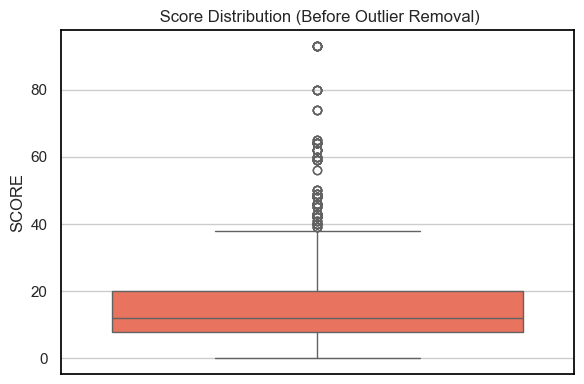

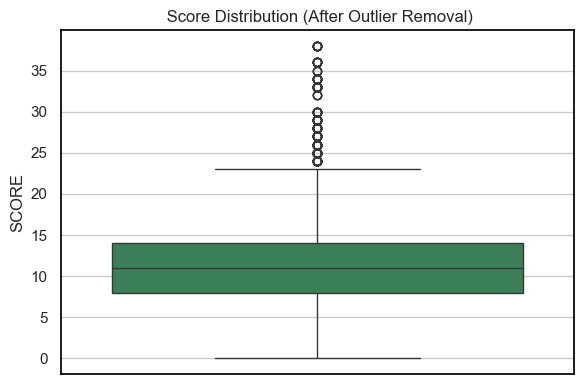

 Outliers removed using IQR method.
Original SCORE rows: 1916
Cleaned SCORE rows: 1745
Outliers removed: 171


In [111]:
# Drop missing SCORE values for analysis
score_data = df[['SCORE']].dropna()

# Boxplot before removing outliers
plt.figure(figsize=(6, 4))
sns.boxplot(data=score_data, y='SCORE', color='tomato')
plt.title(" Score Distribution (Before Outlier Removal)")
plt.tight_layout()
plt.show()

# Apply IQR method
Q1 = score_data['SCORE'].quantile(0.25)
Q3 = score_data['SCORE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
score_clean = score_data[(score_data['SCORE'] >= lower_bound) & (score_data['SCORE'] <= upper_bound)]

# Boxplot after removing outliers
plt.figure(figsize=(6, 4))
sns.boxplot(data=score_clean, y='SCORE', color='seagreen')
plt.title(" Score Distribution (After Outlier Removal)")
plt.tight_layout()
plt.show()

#  Summary
print(" Outliers removed using IQR method.")
print("Original SCORE rows:", score_data.shape[0])
print("Cleaned SCORE rows:", score_clean.shape[0])
print("Outliers removed:", score_data.shape[0] - score_clean.shape[0])


### correlation

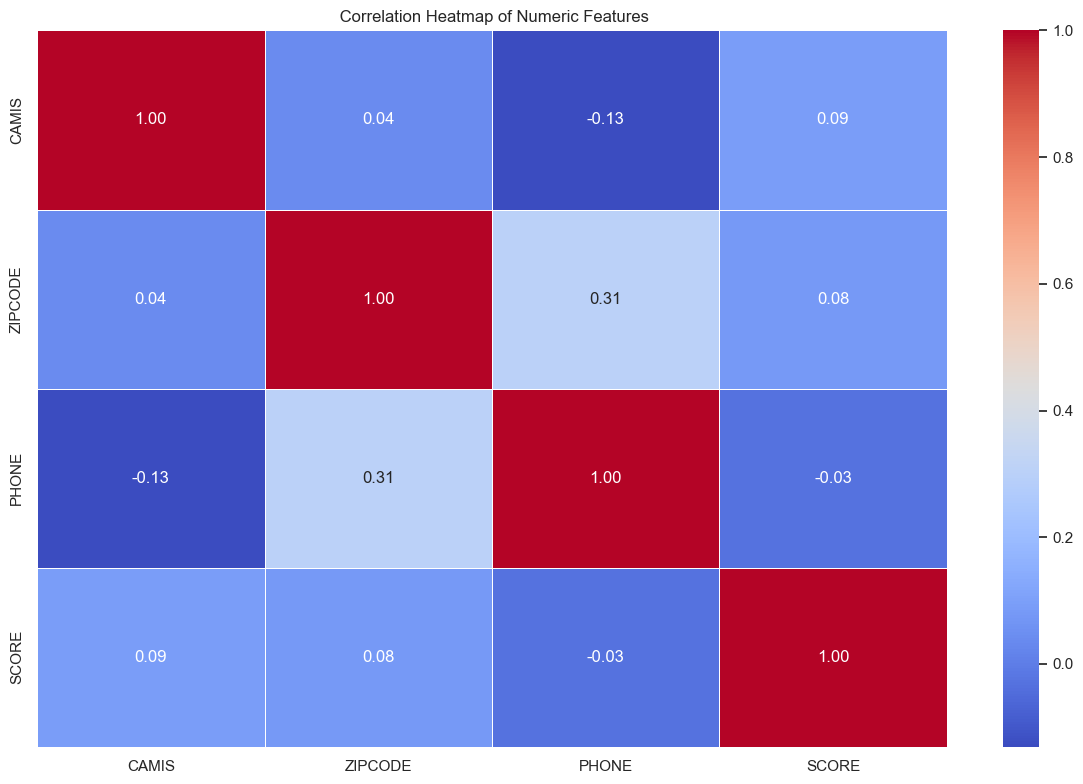

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title(" Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


### visulization

##  Objective 1: Time-based Inspection Analysis

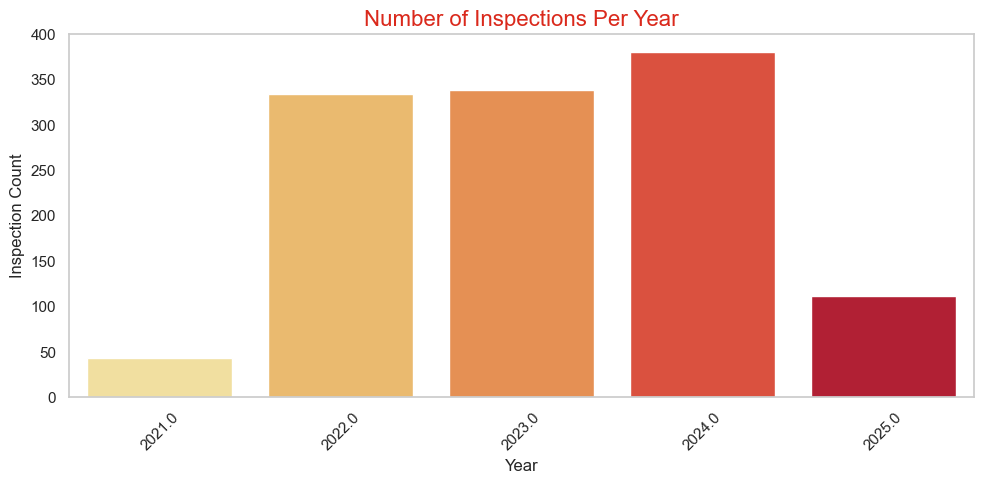

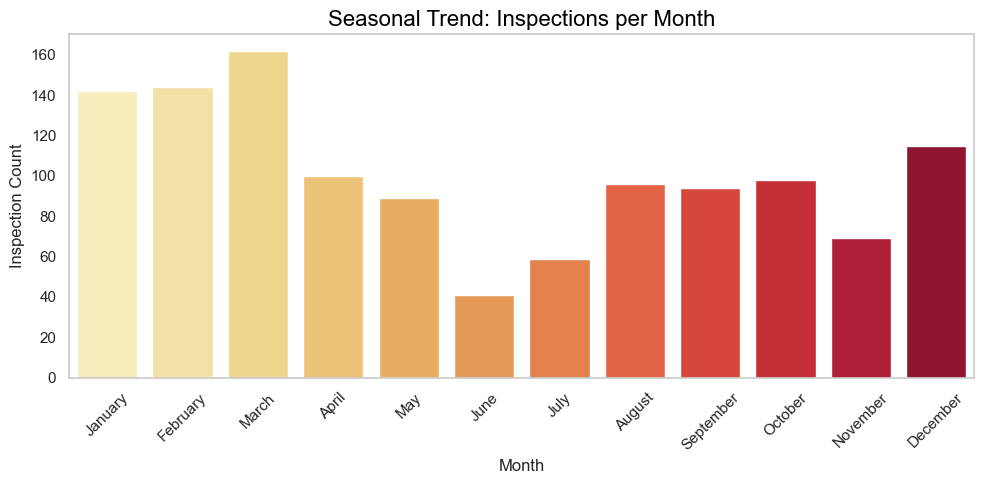

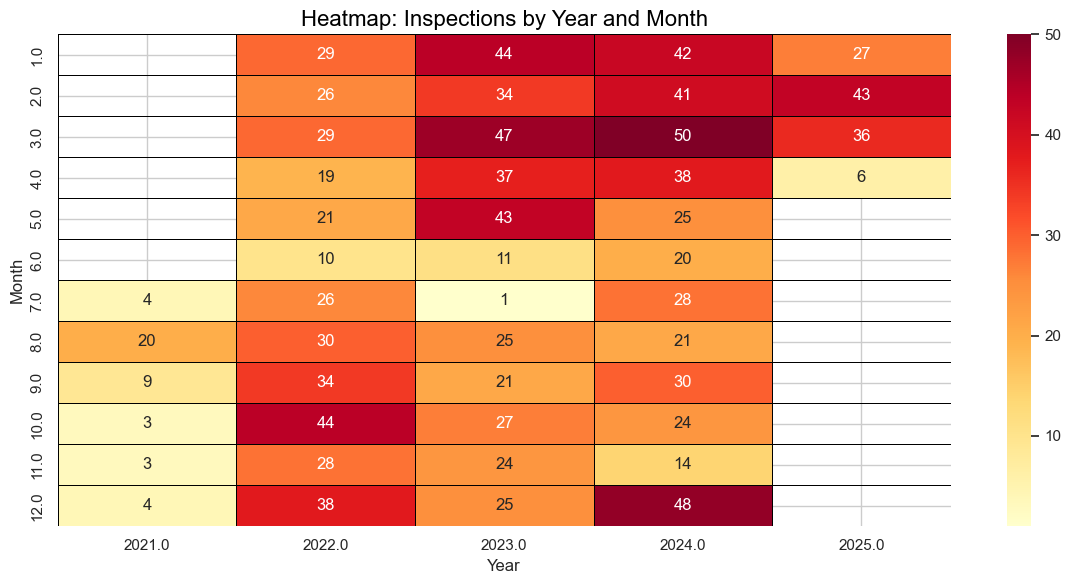

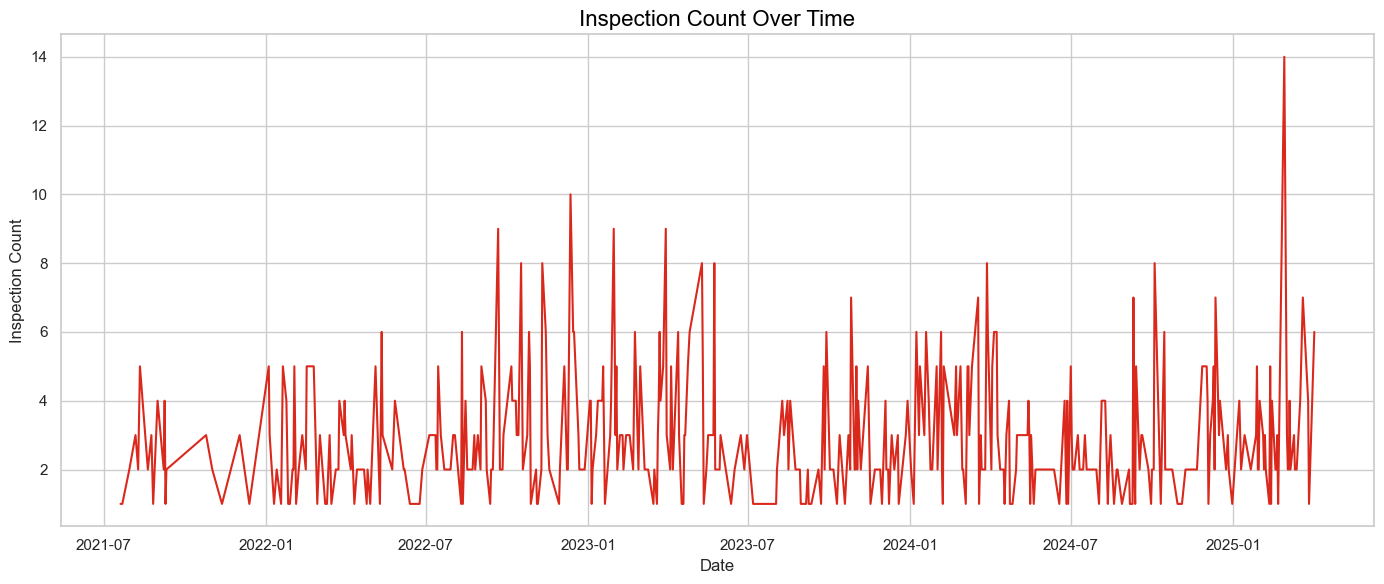

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Create 'inspection_date', 'Year', 'Month', 'Month_Name' from 'GRADE DATE'
df['inspection_date'] = pd.to_datetime(df['GRADE DATE'], errors='coerce')
df['Year'] = df['inspection_date'].dt.year
df['Month'] = df['inspection_date'].dt.month
df['Month_Name'] = df['inspection_date'].dt.strftime('%B')

# Optional: custom month order for plot
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_palette = sns.color_palette("YlOrRd", n_colors=12)

# -- Countplot: Inspections per Year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Year', order=sorted(df['Year'].dropna().unique()), palette="YlOrRd")
plt.title("Number of Inspections Per Year", fontsize=16, color="#DA291C")
plt.xlabel("Year")
plt.ylabel("Inspection Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#  -- Countplot: Inspections per Month (all years)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Month_Name', order=month_order, palette=month_palette)
plt.title("Seasonal Trend: Inspections per Month", fontsize=16, color="#000000")
plt.xlabel("Month")
plt.ylabel("Inspection Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#  -- Heatmap: Inspections by Year and Month
pivot_table = df.pivot_table(index='Month', columns='Year', values='CAMIS', aggfunc='count')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="YlOrRd", annot=True, fmt=".0f", linewidths=0.5, linecolor="black")
plt.title("Heatmap: Inspections by Year and Month", fontsize=16, color="#000000")
plt.ylabel("Month")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

#  -- Line Plot: Daily Inspections Over Time
df_daily = df.groupby('inspection_date').size().reset_index(name='inspection_count')
df_daily = df_daily.sort_values('inspection_date')

plt.figure(figsize=(14, 6))
plt.plot(df_daily['inspection_date'], df_daily['inspection_count'], color="#DA291C", linewidth=1.5)
plt.title("Inspection Count Over Time", fontsize=16, color="#000000")
plt.xlabel("Date")
plt.ylabel("Inspection Count")
plt.grid(True)
plt.tight_layout()
plt.show()


##  Objective 2: Score & Grade Distribution

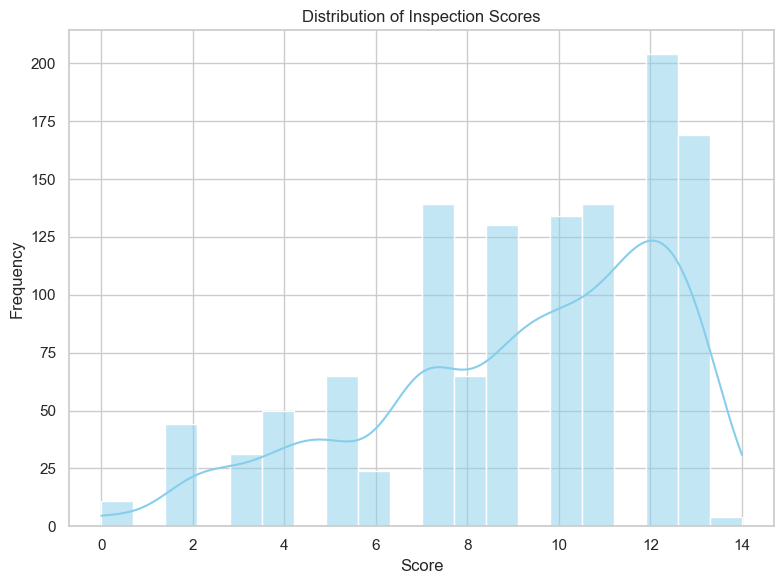

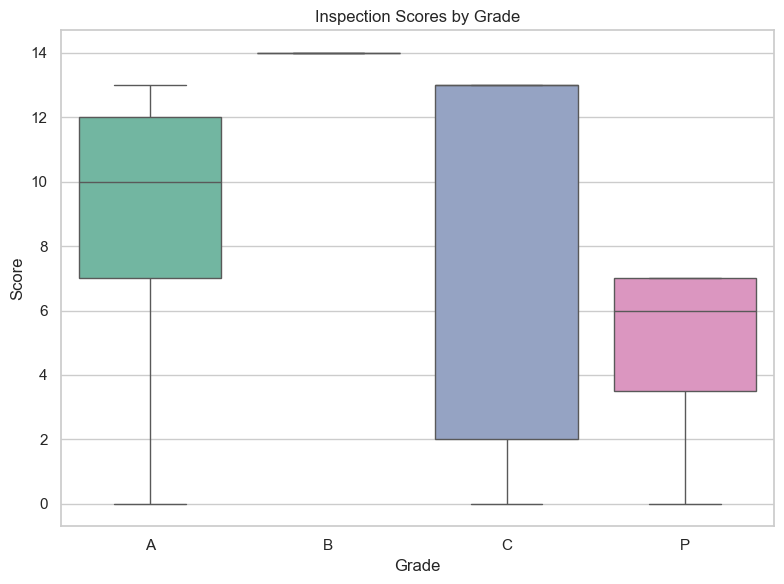

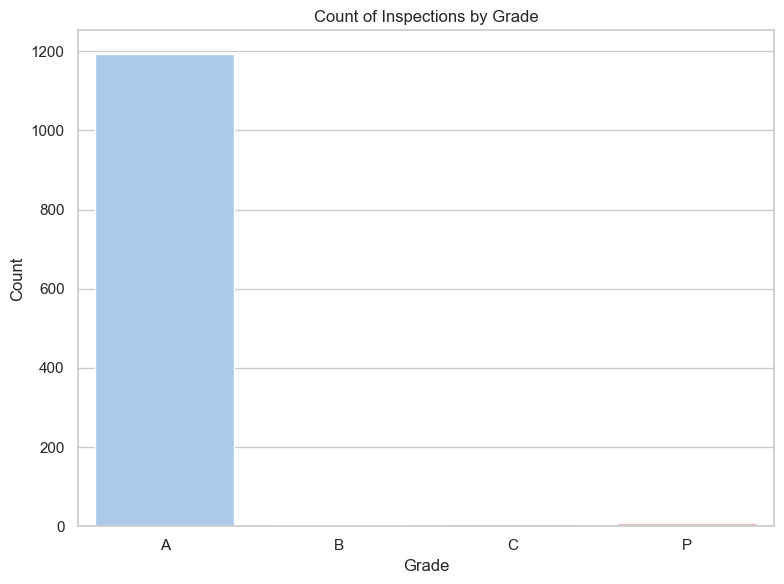

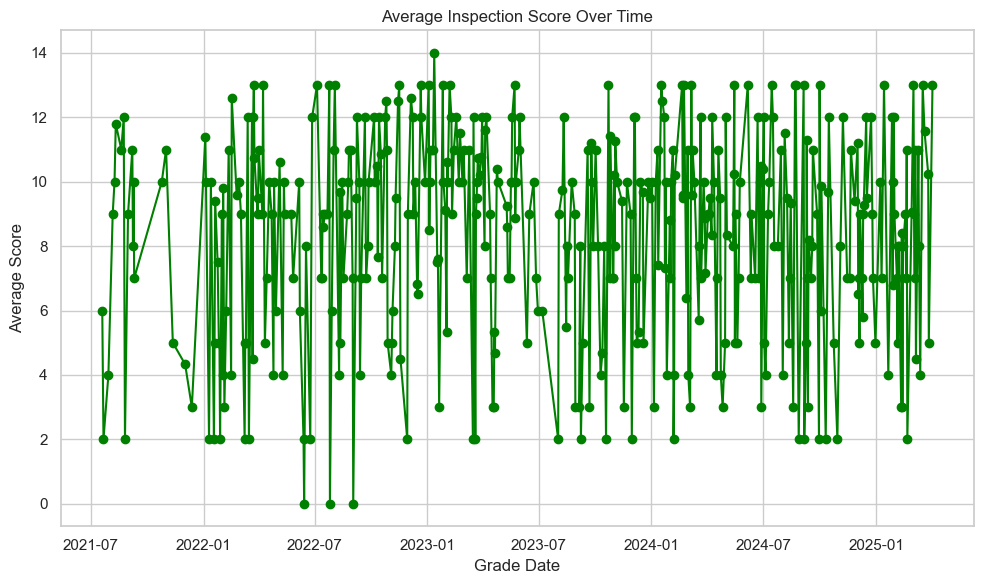

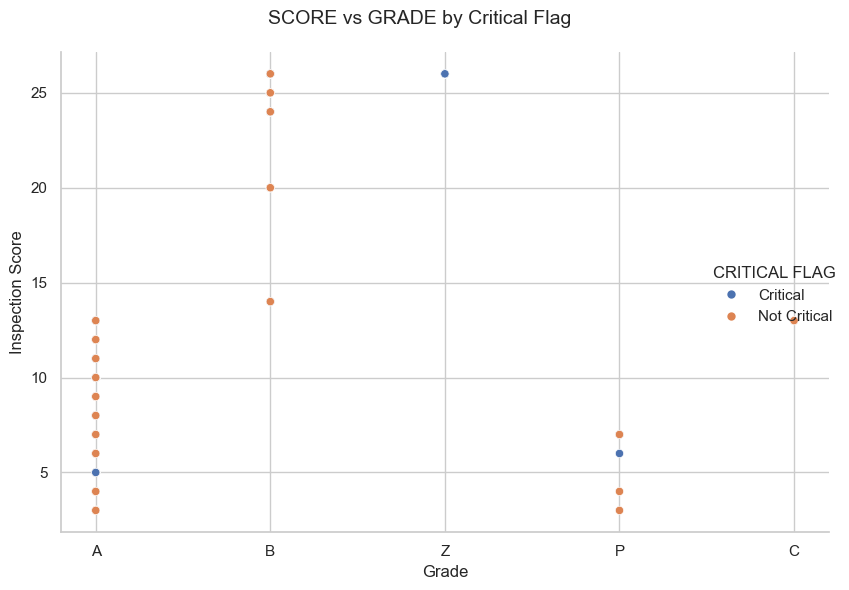

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

#  Handle outliers in 'SCORE' using IQR
Q1 = df['SCORE'].quantile(0.25)
Q3 = df['SCORE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[(df['SCORE'] >= lower_bound) & (df['SCORE'] <= upper_bound)]

#  1. Histogram of Inspection Scores
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['SCORE'], bins=20, color='skyblue', kde=True)
plt.title("Distribution of Inspection Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#  2. Boxplot of Scores by Grade
plt.figure(figsize=(8, 6))
sns.boxplot(x='GRADE', y='SCORE', data=df_clean, palette='Set2')
plt.title("Inspection Scores by Grade")
plt.xlabel("Grade")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

#  3. Countplot of Grades
plt.figure(figsize=(8, 6))
sns.countplot(data=df_clean, x='GRADE', palette='pastel')
plt.title("Count of Inspections by Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#  4. Line plot of Average Score over Time (GRADE DATE)
#  4. Line plot of Average Score over Time (GRADE DATE)
df_clean.loc[:, 'GRADE DATE'] = pd.to_datetime(df_clean['GRADE DATE'], errors='coerce')
df_grouped = df_clean.groupby('GRADE DATE')['SCORE'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(df_grouped['GRADE DATE'], df_grouped['SCORE'], marker='o', linestyle='-', color='green')
plt.title("Average Inspection Score Over Time")
plt.xlabel("Grade Date")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()

#  5. Relplot: Score vs Grade with Critical Flag (remove outliers again)
df_filtered = df[(df['SCORE'] >= df['SCORE'].quantile(0.05)) & (df['SCORE'] <= df['SCORE'].quantile(0.95))]
sns.set(style="whitegrid")
rel = sns.relplot(data=df_filtered, x="GRADE", y="SCORE", kind="scatter", hue="CRITICAL FLAG", height=6, aspect=1.2)
rel.fig.suptitle("SCORE vs GRADE by Critical Flag", fontsize=14)
rel.set_axis_labels("Grade", "Inspection Score")
plt.tight_layout()
plt.show()


##  Objective 3: Critical vs Non-Critical Violations

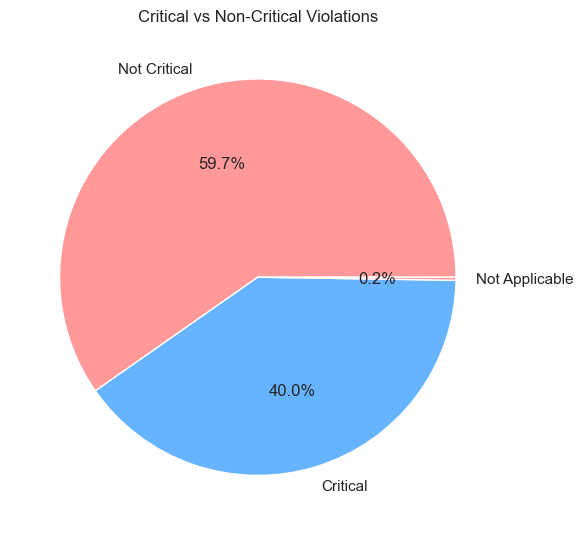

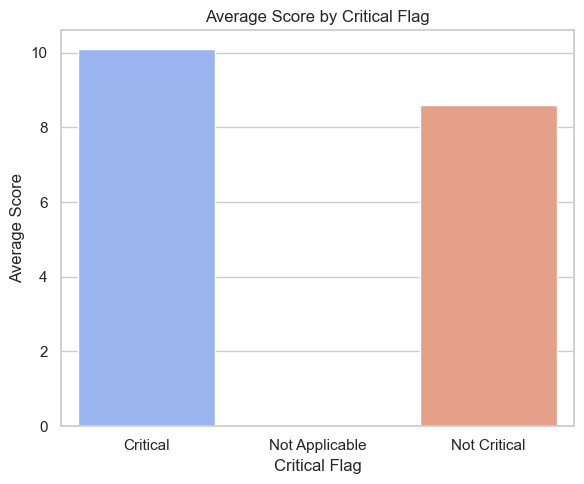

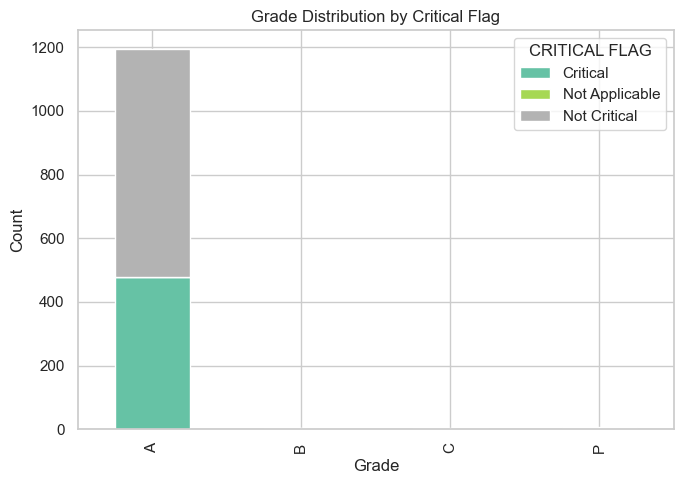

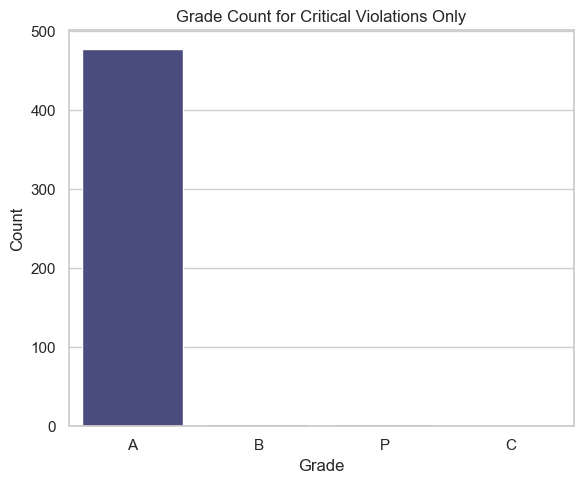

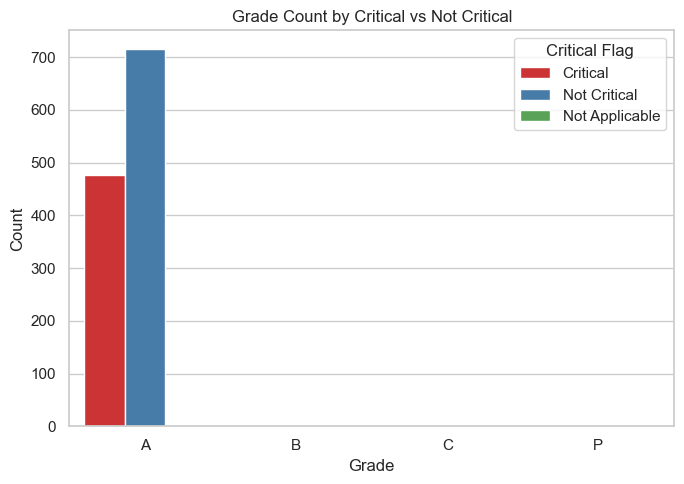

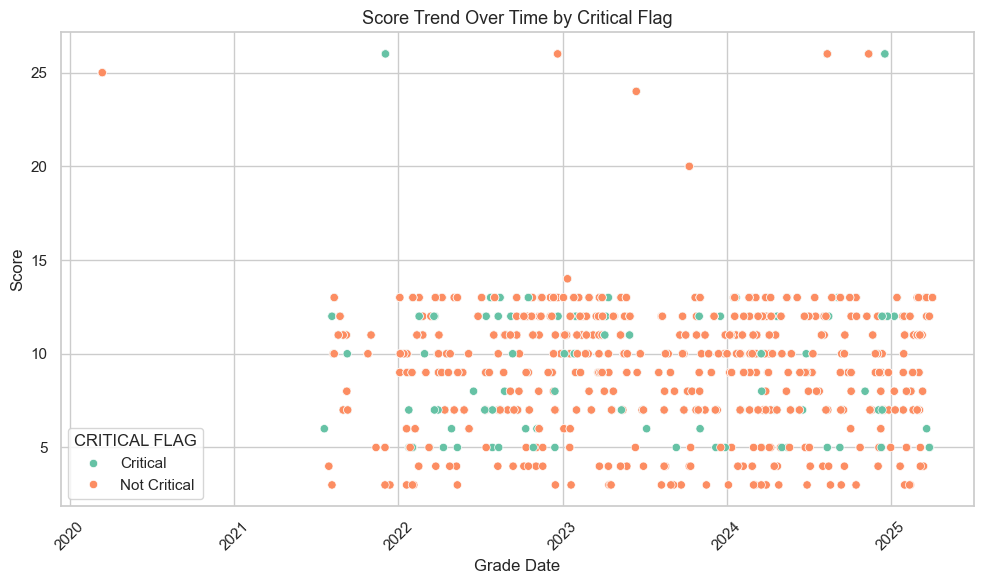

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Handle outliers in SCORE using IQR
Q1 = df['SCORE'].quantile(0.25)
Q3 = df['SCORE'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_clean = df[(df['SCORE'] >= lower) & (df['SCORE'] <= upper)]

#  Fix: Avoid SettingWithCopyWarning
df_clean.loc[:, 'GRADE DATE'] = pd.to_datetime(df_clean['GRADE DATE'])

# 1. Pie Chart – Count of Critical vs Non-Critical
plt.figure(figsize=(6, 6))
df_clean['CRITICAL FLAG'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Critical vs Non-Critical Violations')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 2. Bar Chart – Average Score by Critical Flag
avg_scores = df_clean.groupby('CRITICAL FLAG')['SCORE'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(data=avg_scores, x='CRITICAL FLAG', y='SCORE', palette='coolwarm')
plt.title('Average Score by Critical Flag')
plt.xlabel('Critical Flag')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

# 3. Stacked Bar Chart – Grade Distribution by Critical Flag
grade_crit = pd.crosstab(df_clean['GRADE'], df_clean['CRITICAL FLAG'])

grade_crit.plot(kind='bar', stacked=True, figsize=(7, 5), colormap='Set2')
plt.title('Grade Distribution by Critical Flag')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 4. Bar Chart – Grade Counts for Critical Violations Only
critical_only = df_clean[df_clean['CRITICAL FLAG'] == 'Critical']
plt.figure(figsize=(6, 5))
sns.countplot(data=critical_only, x='GRADE', palette='viridis')
plt.title('Grade Count for Critical Violations Only')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 5. Grouped Bar Chart – Grade count by Critical Flag
plt.figure(figsize=(7, 5))
sns.countplot(data=df_clean, x='GRADE', hue='CRITICAL FLAG', palette='Set1')
plt.title('Grade Count by Critical vs Not Critical')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Critical Flag')
plt.tight_layout()
plt.show()

# 6. Scatter Plot – Score Trend Over Time (with outlier removal)
df_filtered = df[(df['SCORE'] >= df['SCORE'].quantile(0.05)) & (df['SCORE'] <= df['SCORE'].quantile(0.95))]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x="GRADE DATE", y="SCORE", hue="CRITICAL FLAG", palette="Set2")
plt.title("Score Trend Over Time by Critical Flag", fontsize=13)
plt.xlabel("Grade Date")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  Objective 4: Top Violation Codes & Descriptions

Top 10 Violation Codes:
 VIOLATION CODE
10F    405
10B    155
06D    145
06C     80
08A     80
02G     63
04N     48
04L     30
10H     24
04H     21
Name: count, dtype: int64

Top 10 Violation Descriptions:
 VIOLATION DESCRIPTION
Non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                                                                335
Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.                                                                                                                                         145
Anti-siphonage or back-flow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly. Condensation or liquid

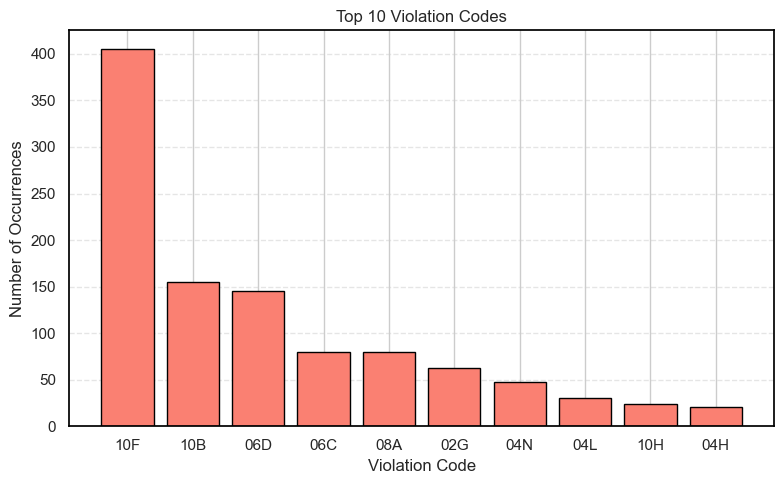

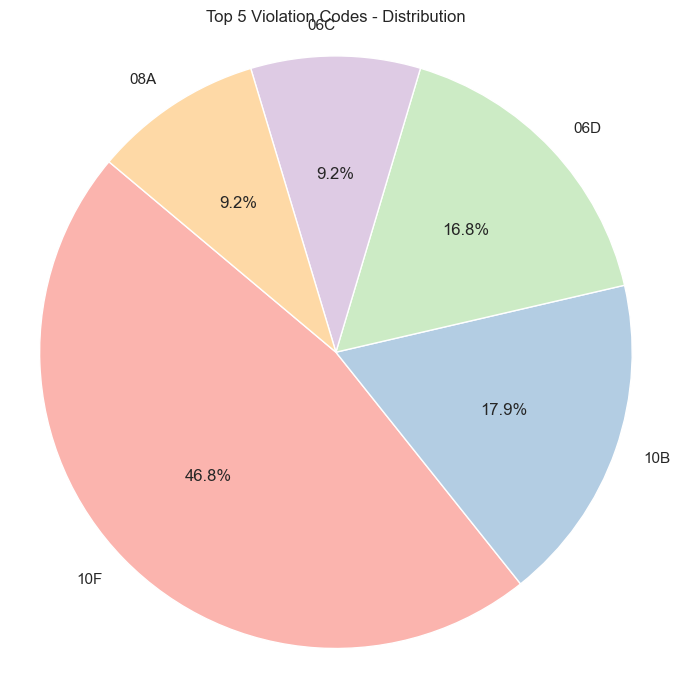

In [30]:
top_violations = df['VIOLATION CODE'].value_counts().head(10)
top_descriptions = df['VIOLATION DESCRIPTION'].value_counts().head(10)

print("Top 10 Violation Codes:\n", top_violations)
print("\nTop 10 Violation Descriptions:\n", top_descriptions)

df_violation = df[['VIOLATION CODE']].dropna()

# Count top 10 violation codes
top_codes = df_violation['VIOLATION CODE'].value_counts().head(10)

# Bar chart - Top 10 Violation Codes
plt.figure(figsize=(8, 5))
plt.bar(top_codes.index, top_codes.values, color='salmon', edgecolor='black')
plt.title("Top 10 Violation Codes", fontsize=12)
plt.xlabel("Violation Code")
plt.ylabel("Number of Occurrences")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
top_5_codes = df_violation['VIOLATION CODE'].value_counts().head(5)

plt.figure(figsize=(7, 7))
plt.pie(top_5_codes.values, labels=top_5_codes.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Top 5 Violation Codes - Distribution")
plt.axis('equal')  # Circle shape
plt.tight_layout()
plt.show()

##  Objective 5: Borough-wise Analysis

               count      mean
BORO                          
Brooklyn         394  8.926396
Manhattan        275  9.294545
Queens           270  9.359259
Bronx            224  9.120536
Staten Island     49  9.714286


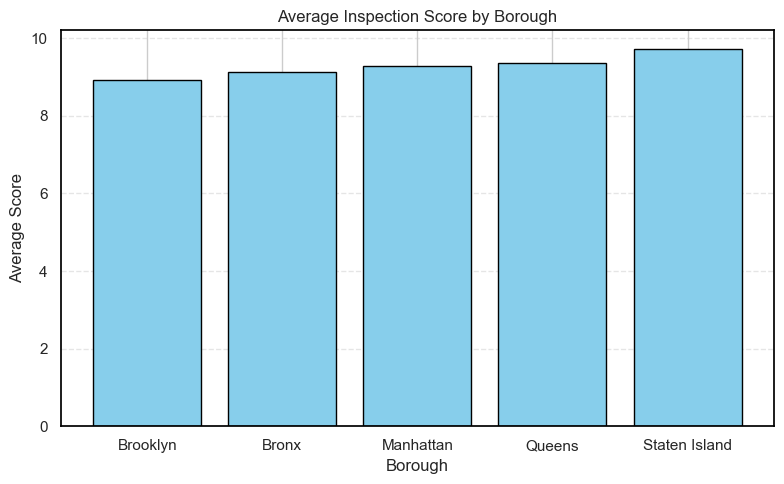

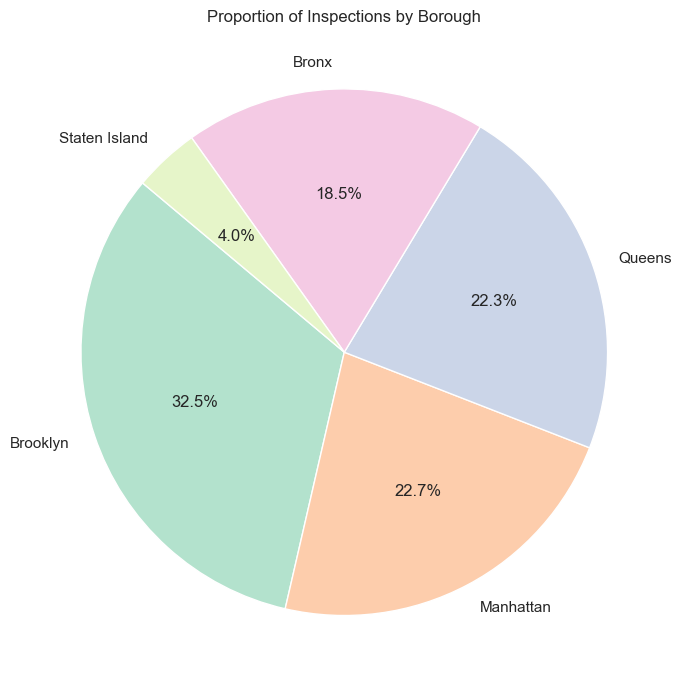

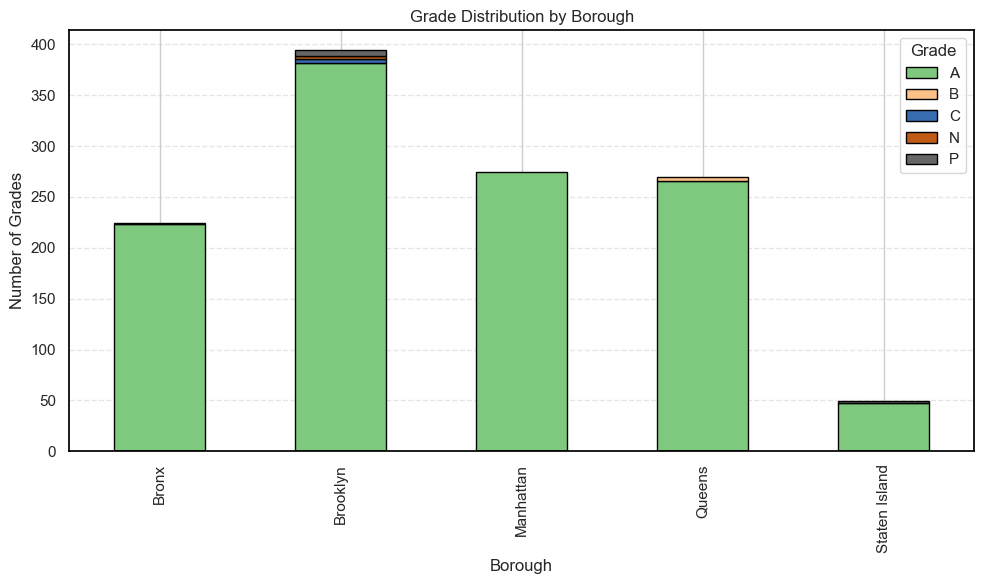

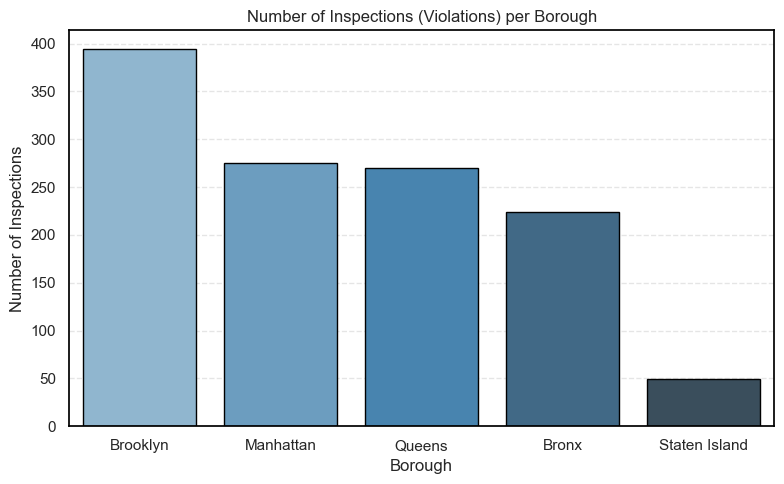

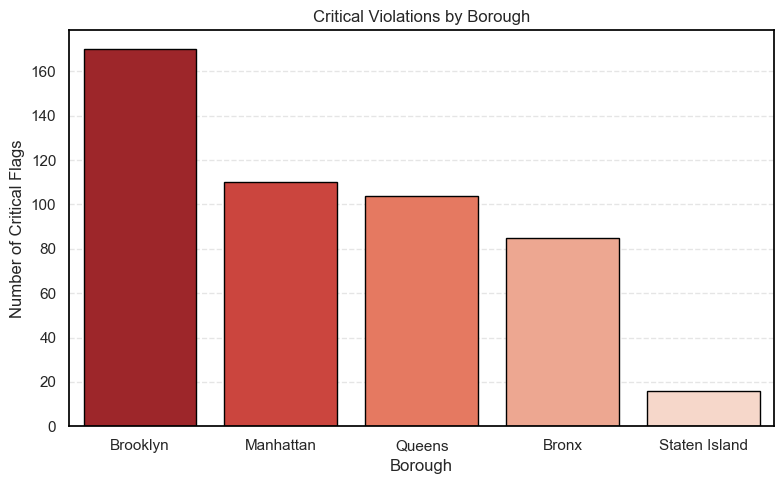

In [45]:
boro_group = df.groupby('BORO')['SCORE'].agg(['count', 'mean']).sort_values(by='count', ascending=False)
print(boro_group)
# 1. Bar Chart - Average Score by Borough
avg_score = df_borough.groupby('BORO')['SCORE'].mean().sort_values()

plt.figure(figsize=(8, 5))
plt.bar(avg_score.index, avg_score.values, color='skyblue', edgecolor='black')
plt.title("Average Inspection Score by Borough", fontsize=12)
plt.xlabel("Borough")
plt.ylabel("Average Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# 2. Pie Chart - Number of Inspections by Borough
borough_counts = df_borough['BORO'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(borough_counts.values, labels=borough_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel2.colors)
plt.title("Proportion of Inspections by Borough")
plt.axis('equal')
plt.tight_layout()
plt.show()
# Prepare data for grade distribution
df_grade = df[['BORO', 'GRADE']].dropna()

grade_counts = df_grade.groupby(['BORO', 'GRADE']).size().unstack().fillna(0)

# 3. Stacked Bar Chart - Grade Distribution by Borough
grade_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent', edgecolor='black')

plt.title("Grade Distribution by Borough", fontsize=12)
plt.xlabel("Borough")
plt.ylabel("Number of Grades")
plt.legend(title="Grade")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# Total number of inspections per borough
violation_counts = df['BORO'].value_counts().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=violation_counts.index, y=violation_counts.values, palette='Blues_d', edgecolor='black')
plt.title("Number of Inspections (Violations) per Borough", fontsize=12)
plt.xlabel("Borough")
plt.ylabel("Number of Inspections")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# Filter only critical violations
critical_data = df[df['CRITICAL FLAG'] == 'Critical']

# Count critical flags by borough
critical_counts = critical_data['BORO'].value_counts().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=critical_counts.index, y=critical_counts.values, palette='Reds_r', edgecolor='black')
plt.title("Critical Violations by Borough", fontsize=12)
plt.xlabel("Borough")
plt.ylabel("Number of Critical Flags")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
